In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

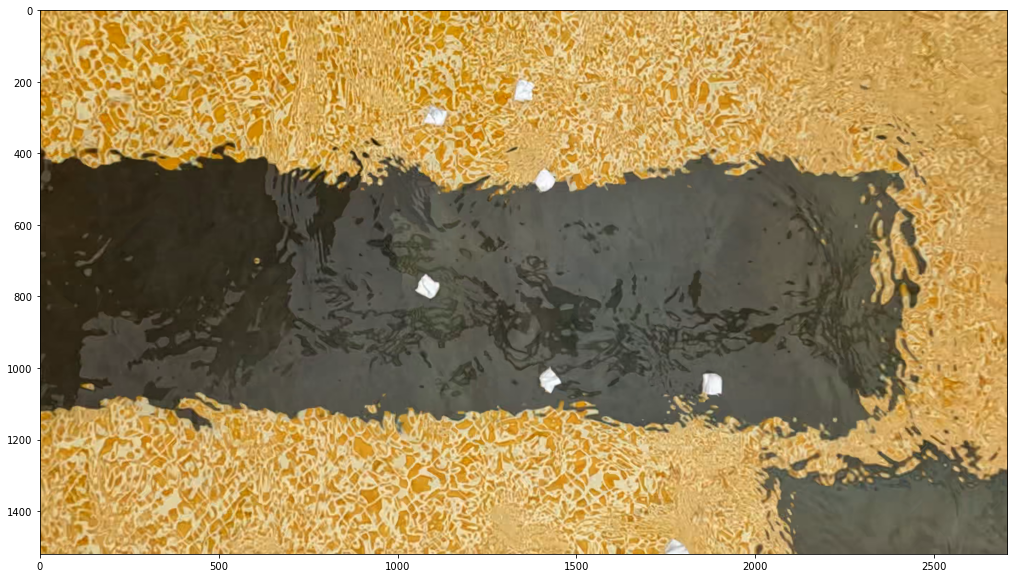

In [16]:
test = cv2.imread("pp/test.bmp", 1)
fig, ax = plt.subplots(figsize=(18, 10))
plt.imshow(test)

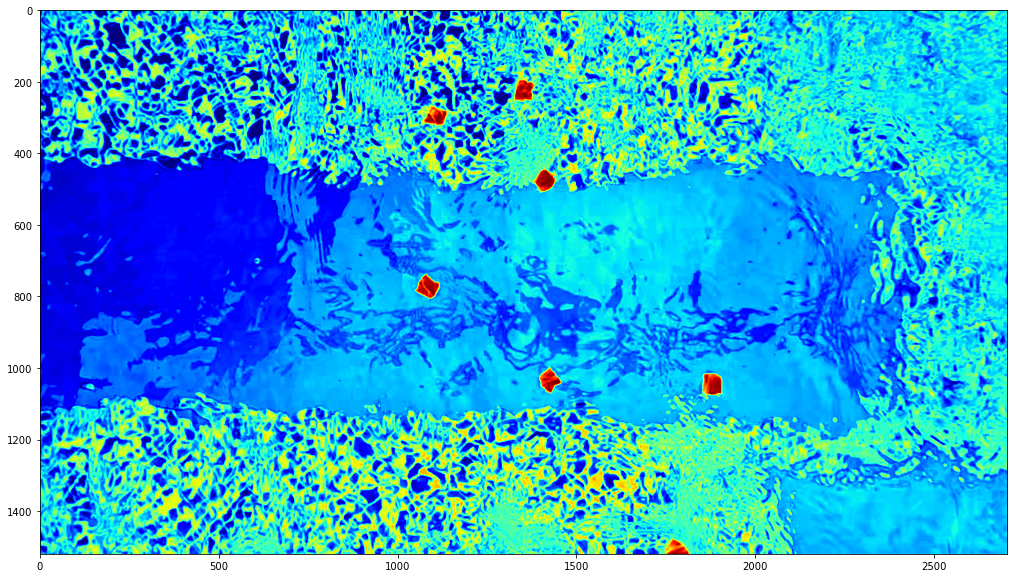

In [17]:
test_r = test[:, :, 2]
fig, ax = plt.subplots(figsize=(18, 10))
plt.imshow(test_r, cmap='jet')

In [18]:
_, test_180 = cv2.threshold(test_r, 180, 255, cv2.THRESH_BINARY)

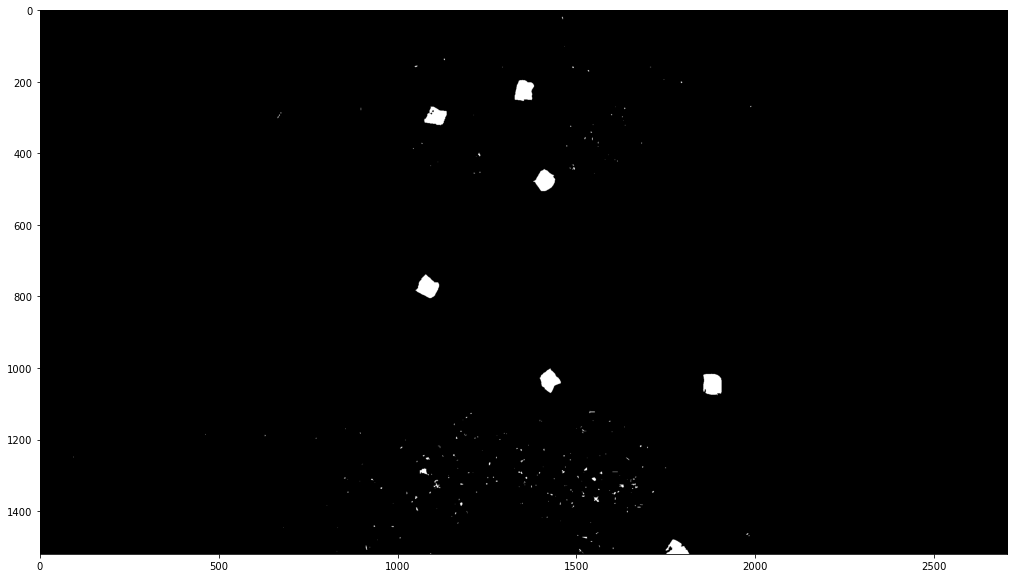

In [19]:
_, ax = plt.subplots(figsize=(18, 10))
ax.imshow(test_180, cmap='gray')

In [20]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(test_180)

In [23]:
import random


random.seed(1234)

def put_color_to_objects(src_img, label_table):
    label_img = np.zeros_like(src_img)
    for label in range(1, label_table.max()+1):
        label_group_index = np.where(label_table == label)
        label_img[label_group_index] = random.sample(range(255), k=3)

    return label_img

In [25]:
def area_threshold_img(label_table, stats_table):
    area = stats_table[:, -1]

    for i in range(len(area)):
        if area[i] < 1000:
            label_table[label_table == i] = 0

    return label_table

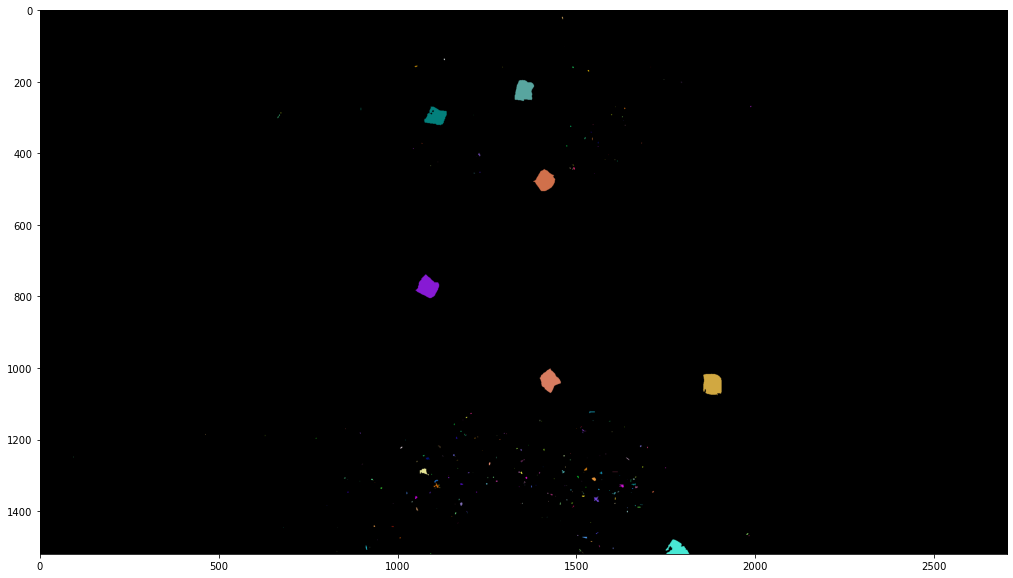

In [24]:
_, ax = plt.subplots(figsize=(18, 10))
ax.imshow(put_color_to_objects(cv2.cvtColor(test_180, cv2.COLOR_GRAY2RGB), labels), cmap='gray')

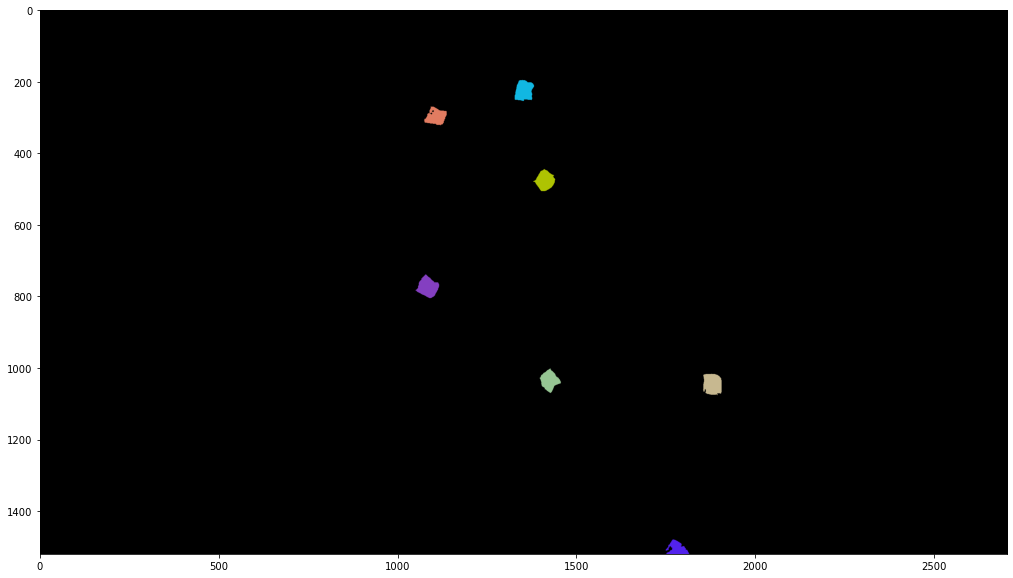

In [26]:
_, ax = plt.subplots(figsize=(18, 10))
ax.imshow(put_color_to_objects(cv2.cvtColor(test_180, cv2.COLOR_GRAY2RGB), area_threshold_img(labels, stats)), cmap='gray')

### threshold -> 180

In [36]:
def preprocessing(img):
    img = img[:, :, 2]
    _, img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
    _, _, stats, centroids = cv2.connectedComponentsWithStats(img)
    centroids = np.hstack([centroids, stats])
    centroids = centroids[centroids[:, -1] > 1000]

    return centroids[1:, :2]

In [37]:
result = preprocessing(img=test)